In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks, rotate, resize

from PIL import Image
import cv2


from skimage import io, color, transform, img_as_ubyte
import numpy as np
import os

In [63]:
import os
os.getcwd()

'/home/mayank_khulbe_farmart_co/fmt/document-alignment-detection/experiments'

In [114]:
path = "../document_alignment_correction/data/original_images/test/zzyw0224_10.png"
path = "mayank/weight.jpeg"

In [129]:
image = Image.open(path)
rotated_img = image.rotate(270, expand=True)
rotated_img.save("rotated_image.png")

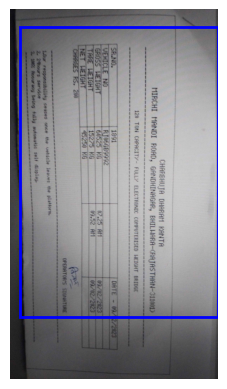

In [128]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure

# Load the image
image = io.imread(path)

# Convert the image to grayscale if it is in color
if image.ndim == 3:
    gray = color.rgb2gray(image)
else:
    gray = image

# Apply thresholding
threshold = filters.threshold_otsu(gray)
binary = gray > threshold

# Label connected regions in the binary image
label_image = measure.label(binary)

# Get properties of connected regions
regions = measure.regionprops(label_image, intensity_image=gray)

# Get the largest region
largest_region = max(regions, key=lambda r: r.area)

# Get the bounding box of the largest region
min_row, min_col, max_row, max_col = largest_region.bbox

# Create a rectangle that tightly encloses the bounding box
rectangle = plt.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row,
                          fill=False, edgecolor='blue', linewidth=2)

# Display the image with the rectangle
fig, ax = plt.subplots()
ax.imshow(image)
ax.add_patch(rectangle)
plt.axis("off")
plt.show()


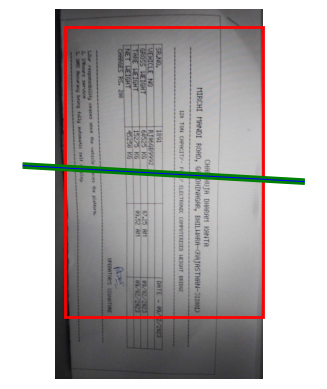

In [122]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
import numpy as np

# Load the image
image = io.imread(path)

# Convert the image to grayscale if it is in color
if image.ndim == 3:
    gray = color.rgb2gray(image)
else:
    gray = image

# Apply thresholding
threshold = filters.threshold_otsu(gray)
binary = gray > threshold

# Label connected regions in the binary image
label_image = measure.label(binary)

# Get properties of connected regions
regions = measure.regionprops(label_image, intensity_image=gray)

# Get the largest region
largest_region = max(regions, key=lambda r: r.area)

# Get the bounding box of the largest region
min_row, min_col, max_row, max_col = largest_region.bbox

# Calculate the angle and length of the longest line in the largest region
orientation = largest_region.orientation
major_axis_length = largest_region.major_axis_length

# Calculate the endpoints of the longest line
line_length = major_axis_length / 2
x_center = (min_col + max_col) / 2
y_center = (min_row + max_row) / 2
x1 = x_center + (line_length * np.cos(orientation))
y1 = y_center + (line_length * np.sin(orientation))
x2 = x_center - (line_length * np.cos(orientation))
y2 = y_center - (line_length * np.sin(orientation))

# Define the distance between the parallel lines
distance_between_lines = 20  # Adjust as needed

# Calculate the perpendicular angle
perpendicular_angle = orientation + np.pi/2

# Calculate the displacement for parallel lines
dx = distance_between_lines * np.cos(perpendicular_angle)
dy = distance_between_lines * np.sin(perpendicular_angle)

# Calculate the endpoints of the parallel lines
parallel_x1 = x1 + dx
parallel_y1 = y1 + dy
parallel_x2 = x2 + dx
parallel_y2 = y2 + dy

# Display the image with the bounding box and the parallel lines
fig, ax = plt.subplots()
ax.imshow(image)

# Draw the bounding box
rect = plt.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row,
                     fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)

# Draw the parallel lines
ax.plot([parallel_x1, parallel_x2], [parallel_y1, parallel_y2], color='blue', linewidth=2)
ax.plot([parallel_x1, parallel_x2], [parallel_y1 + distance_between_lines, parallel_y2 + distance_between_lines], color='green', linewidth=2)
ax.plot([parallel_x1, parallel_x2], [parallel_y1 - distance_between_lines, parallel_y2 - distance_between_lines], color='green', linewidth=2)

plt.axis("off")
plt.show()


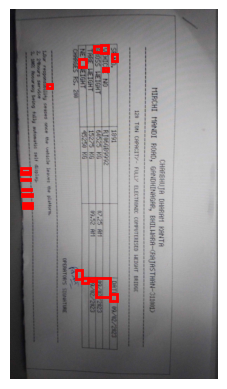

In [117]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure

# Load the image
image = io.imread(path)

# Convert the image to grayscale if it is in color
if image.ndim == 3:
    gray = color.rgb2gray(image)
else:
    gray = image

# Apply thresholding
threshold = filters.threshold_otsu(gray)
binary = gray > threshold

# Label connected regions in the binary image
label_image = measure.label(binary)

# Get properties of connected regions
regions = measure.regionprops(label_image, intensity_image=gray)

# Filter the regions based on size and distance from image border
min_region_size = 1000  # Adjust as needed
min_distance_from_border = 20  # Adjust as needed
filtered_regions = []

for region in regions:
    if region.area > min_region_size:
        min_row, min_col, max_row, max_col = region.bbox
        distance_from_border = min(min_row, min_col, binary.shape[0] - max_row, binary.shape[1] - max_col)
        if distance_from_border > min_distance_from_border:
            filtered_regions.append(region)

# Get the bounding boxes of the filtered regions
bounding_boxes = [region.bbox for region in filtered_regions]

# Display the image with the filtered bounding boxes
fig, ax = plt.subplots()
ax.imshow(image)

for bbox in bounding_boxes:
    min_row, min_col, max_row, max_col = bbox
    rect = plt.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row,
                         fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.axis("off")
plt.show()


In [85]:
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [86]:
import numpy as np
from skimage import color, io
from skimage.filters import threshold_otsu, sobel
from skimage.transform import rotate, hough_line, hough_line_peaks
import matplotlib.pyplot as plt

def binarizeImage(RGB_image):
    if len(RGB_image.shape) == 3 and RGB_image.shape[2] == 3:
        image = color.rgb2gray(RGB_image)
    else:
        image = RGB_image  # Assume grayscale image if not 3-channel RGB

    threshold = threshold_otsu(image)
    bina_image = image < threshold

    return bina_image

def findEdges(bina_image):
    image_edges = sobel(bina_image)

    plt.imshow(image_edges, cmap='gray')
    plt.axis('off')
    plt.title('Binary Image Edges')
    # plt.savefig('/content/drive/My Drive/binary_image.png')

    return image_edges

def findTiltAngle(image_edges):
    h, theta, d = hough_line(image_edges)
    accum, angles, dists = hough_line_peaks(h, theta, d)
    print(angles)
    m_angle = np.median(angles)
    print(m_angle)
    angle = np.rad2deg(m_angle)
    print(angle)

    r_angle = angle - 90 if angle >= 0 else angle + 90
    print(r_angle)

    # Plot Image and Lines
    fig, ax = plt.subplots()
    ax.imshow(image_edges, cmap='gray')

    origin = np.array((0, image_edges.shape[1]))

    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
        ax.plot(origin, (y0, y1), '-r')

    ax.set_xlim(origin)
    ax.set_ylim((image_edges.shape[0], 0))
    ax.set_axis_off()
    ax.set_title('Detected lines')

    plt.savefig('hough_lines.png')
    plt.show()

    return r_angle

def rotateImage(RGB_image, angle):
    fixed_image = rotate(RGB_image, angle)

    plt.imshow(fixed_image)
    plt.axis('off')
    plt.title('Fixed Image')
    # plt.savefig('/content/drive/My Drive/fixed_image.png')
    plt.show()

    return fixed_image

def generalPipeline(image_path):
    image = io.imread(image_path)
    bina_image = binarizeImage(image)
    image_edges = findEdges(bina_image)
    angle = findTiltAngle(image_edges)
    fixed_image = rotateImage(image, angle)

    # Convert the image to uint8 mode before saving
    rotated_image_uint8 = (fixed_image * 255).astype(np.uint8)

    # Save the rotated image
    io.imsave('rotated_image_hough.png', rotated_image_uint8)
    return fixed_image, rotated_image_uint8

# # Example usage
# image_path = "path/to/your/image.png"
# generalPipeline(image_path)


In [87]:
def detect_flip(image, verbose=False):
    mask = np.zeros(image.shape, dtype=np.uint8)
    blur = cv2.GaussianBlur(image, (3,3), 0)
    adaptive = cv2.adaptiveThreshold(
        blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,4
    )

    cnts = cv2.findContours(adaptive, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    for c in cnts:
        area = cv2.contourArea(c)
        if area < 45000 and area > 20:
            cv2.drawContours(mask, [c], -1, (255,255,255), -1)
            
    h, w = mask.shape
    
    if verbose:
        fig, ax = plt.subplots(1,3, figsize=(20, 20))
        ax[0].imshow(image, cmap='gray')
        ax[0].set_title('Original', fontsize=12)
        ax[0].axis('off')
        ax[1].imshow(adaptive, cmap='gray')
        ax[1].set_title('Thresholded', fontsize=12)
        ax[1].axis('off')
        ax[2].imshow(mask, cmap='gray')
        ax[2].set_title('Mask', fontsize=12)
        ax[2].axis('off')
        plt.show()
    
    
    left = mask[0:h, 0:0+w//2]
    right = mask[0:h, w//2:]
    left_pixels = cv2.countNonZero(left)
    right_pixels = cv2.countNonZero(right)
    return 0 if left_pixels >= right_pixels else 180


[ 1.55334303 -1.57079633  1.55334303  1.55334303  1.55334303  1.51843645
 -1.57079633  1.53588974  1.53588974  0.78539816  0.78539816 -1.55334303
 -1.57079633  0.78539816 -1.57079633  1.51843645  1.53588974 -1.57079633
  0.78539816 -1.57079633 -1.57079633  1.55334303  1.50098316  0.78539816
  1.51843645  0.31415927  1.44862328  0.27925268  0.33161256  1.55334303
  0.29670597  0.31415927 -1.55334303  0.36651914  1.43116999 -1.55334303
  0.34906585  1.55334303  0.41887902  0.78539816  0.20943951  0.40142573
  0.27925268 -1.53588974  0.36651914  0.34906585  0.2268928  -1.53588974
  0.2268928   0.26179939 -1.57079633  0.78539816 -1.57079633  1.55334303
  1.41371669  0.20943951 -1.57079633  0.19198622  1.3962634   0.19198622
  0.43633231  1.37881011  1.53588974 -1.48352986  0.78539816  0.78539816
  1.53588974  1.3962634   0.19198622  1.53588974 -1.50098316  1.30899694
  1.55334303  1.3962634   0.78539816  1.37881011 -1.57079633  0.78539816
  1.36135682  1.55334303 -0.78539816 -1.57079633  1

/var/tmp/ipykernel_5315/2027970017.py:47: RuntimeWarning: divide by zero encountered in divide
  y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)


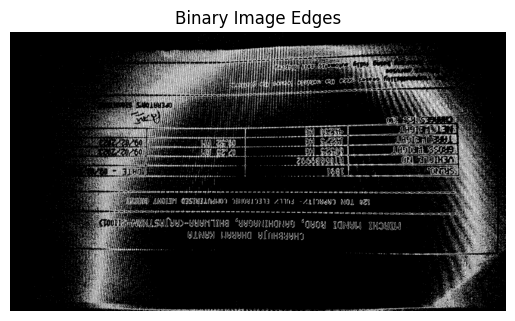

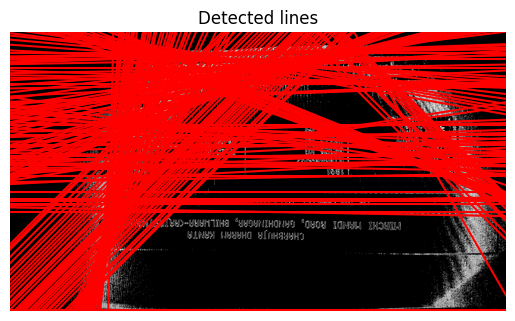

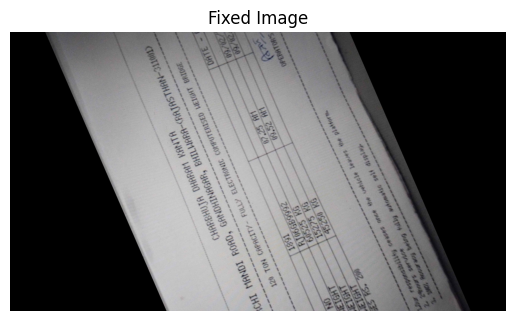

(2160, 3840, 3)

In [131]:
_, rotated_img = generalPipeline("rotated_image.png")
rotated_img.shape

In [133]:
rotated_img = io.imread(path)
rotated_img.shape

(3840, 2160, 3)

In [134]:
def detect_flip(image, verbose=False):
    mask = np.zeros(image.shape, dtype=np.uint8)
    
    if len(image.shape) == 3 and image.shape[2] == 3:  # Color image
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:  # Grayscale image
        gray = image
    
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    adaptive = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 4
    )

    cnts = cv2.findContours(adaptive, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    for c in cnts:
        area = cv2.contourArea(c)
        if area < 45000 and area > 20:
            cv2.drawContours(mask, [c], -1, (255, 255, 255), -1)
    
    if len(image.shape) == 3 and image.shape[2] == 3:  # Color image
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    
    h, w = mask.shape
    
    if verbose:
        fig, ax = plt.subplots(1, 3, figsize=(20, 20))
        ax[0].imshow(image, cmap='gray')
        ax[0].set_title('Original', fontsize=12)
        ax[0].axis('off')
        ax[1].imshow(adaptive, cmap='gray')
        ax[1].set_title('Thresholded', fontsize=12)
        ax[1].axis('off')
        ax[2].imshow(mask, cmap='gray')
        ax[2].set_title('Mask', fontsize=12)
        ax[2].axis('off')
        plt.show()
    
    left = mask[0:h, 0:0+w//2]
    right = mask[0:h, w//2:]
    left_pixels = cv2.countNonZero(left)
    right_pixels = cv2.countNonZero(right)
    return 0 if left_pixels >= right_pixels else 180


In [135]:
angle = detect_flip(rotated_img)
angle

0

In [ ]:
corrected_image = Image.fromarray(rotated_img).rotate(angle)
corrected_image

In [ ]:
doc_200 = np.array(rotated_img)
corrected_image = correct_angle(doc_200, True)
Image.fromarray(corrected_image)

In [ ]:
from PIL import Image

def rotate_image_to_zero(image_path):
    # Load the image
    image = Image.open(image_path)

    # Convert the image to RGBA if it's not already
    if image.mode != "RGBA":
        image = image.convert("RGBA")

    # Get the alpha channel of the image
    alpha = image.split()[3]

    # Rotate the image by 90 degrees in steps of 1 degree
    for angle in range(1, 360):
        rotated = image.rotate(angle, expand=True)

        # Check if the rotated image has the same alpha channel
        rotated_alpha = rotated.split()[3]
        if alpha.getbbox() == rotated_alpha.getbbox():
            return rotated.rotate(-angle, expand=True)

    # Return the original image if no rotation is found
    return image



In [ ]:
# from skimage import io, filters
from skimage import io, segmentation
from skimage.color import gray2rgb
import matplotlib.pyplot as plt

# Load the image
image = io.imread('mayank/weight.jpeg', as_gray=True)

# Convert the grayscale image to RGB
image_rgb = gray2rgb(image)

# Perform segmentation to obtain the boundaries
edges = segmentation.find_boundaries(image)

# Visualize the detected outer boundary
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb, cmap='gray')
plt.imshow(edges, cmap='Reds', alpha=0.5)
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('mayank/weight.jpeg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the outermost contour (largest area)
outer_contour = max(contours, key=cv2.contourArea)

# Get the four corner points of the outer contour
corners = cv2.approxPolyDP(outer_contour, 0.01 * cv2.arcLength(outer_contour, True), True)

# Plot the image with marked corners
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
for corner in corners:
    x, y = corner[0]
    plt.plot(x, y, 'ro')
plt.axis('off')
plt.show()


In [ ]:
rotated_image

In [ ]:
image